# Binary classification on a IBM quantum computer

### Libraries

In [1]:
import numpy as np
import pandas as pd
# Qiskit
from qiskit import IBMQ, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

### Functions

In [2]:
def initialize(qc, qubits):
    """Apply a H-gate to 'qubits' in qc (quantum circuit)"""
    for q in qubits:
        qc.h(q)
    return qc

def classification(results):
    """Given results (list of dictionaries with frequencies)
    returns a vector with the corrispective classifications."""
    classification = []
    for i in results:
        if i['1'] > n_iter/4:
            classification += [-1]
        else:
            classification +=[1]
    return classification

### Parameter definition

In [3]:
#non-modifiable parameters
pi = np.pi
circuit_list = []

#circuit's parameters
alpha = pi
theta_list = np.array([0.1,0.3])*pi
n_iter = 20000

### To use quantum devices

In [5]:
# IBM token
token = ...     #API token from IBM Quantum's account
#loading IBM account to have a provider of quantum devices
IBMQ.save_account(token, overwrite=True)
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main') 
#print the list of available devices
available_cloud_backends = provider.backends() 
print('\nHere is the list of cloud backends that are available to you:')
for i in available_cloud_backends: print(i)  

ibmqfactory.load_account:WARNING:2023-10-07 11:10:48,606: Credentials are already in use. The existing account in the session will be replaced.



Here is the list of cloud backends that are available to you:
ibmq_qasm_simulator
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibm_lagos
ibm_nairobi
ibm_perth
ibm_brisbane


In [6]:
#select the device to use
dvc = ...
device = provider.get_backend(dvc)

### Circuit construction

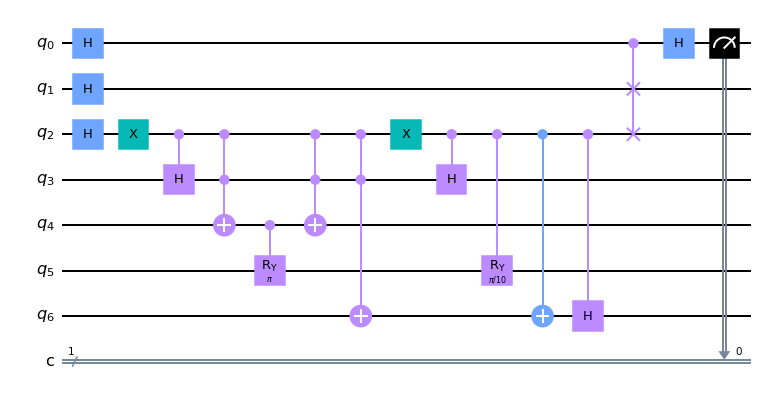

In [7]:
#Inizialization of quantum register (7 qubits) and classical register (1 bit)
qreg_q = QuantumRegister(7, 'q')
creg_c = ClassicalRegister(1, 'c')

#Construction of the circuits (one for each value in theta_list); at the end of the for loop, circuit_list is containing all the circuits
for theta in theta_list:
    circuit = QuantumCircuit(qreg_q, creg_c)

    circuit = initialize(circuit, [0,1,2])
    circuit.x(2)
    circuit.ch(2, 3)
    circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[4])
    circuit.cry(alpha, qreg_q[4], qreg_q[5])
    circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[4])
    circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[6])
    circuit.x(qreg_q[2])
    circuit.ch(qreg_q[2], qreg_q[3])
    circuit.cry(theta, qreg_q[2], qreg_q[5])
    circuit.cx(qreg_q[2], qreg_q[6])
    circuit.ch(qreg_q[2], qreg_q[6])
    circuit.cswap(qreg_q[0], qreg_q[1], qreg_q[2])
    circuit.h(qreg_q[0])
    circuit.measure(qreg_q[0], creg_c[0])
    
    circuit_list += [circuit]

#As an example, I visualize the first circuit in the variable 'circuit_list'
circuit_list[0].draw(output='mpl')

### Compilation

In [ ]:
#compilation of circuits with maximum optimization
transpiled_circuit_list = transpile(circuit_list, device, optimization_level=3)

### Run

In [ ]:
#run
job = device.run(transpiled_circuit_list, shots = n_iter)
#monitoring of execution
job_monitor(job, interval=2)

### Get results

In [ ]:
results = job.result()
answer = results.get_counts()
#grouping data in a dataframe
data = pd.DataFrame(answers)
data['Theta [pi]'] = theta_list/pi
columns_titles = ["Theta [pi]","1",'0']
data=data.reindex(columns=columns_titles)
data['Class'] = classification(answer)

In [ ]:
#saving data
#data.to_csv(saving_path)